# CLEAR-IT Figure 3

Here, we generate the plots shown in Figure 3.

First, let's load the required modules.

In [1]:
import pandas as pd
from pathlib import Path
from clearit.config import OUTPUTS_DIR
from clearit.plotting.boxplot import boxplot_performance
from clearit.metrics.gather_metric import gather_metric
from clearit.io.discover_entries import discover_entries

## Figure 3a
a) shows the micro-average F1-scores for 4-layer MLPs predicting cell classes in the TNBC1-MxIF8 dataset with inForm_MC7 labels. The MLPs receive three different inputs:
1. Features generated by a CLEAR-IT encoder pre-trained on this dataset (blue)
2. Cell expressions and cell sizes computed using the segmentation masks from inForm (red)
3. The concatenation of the previous feature sets (yellow)

Let's first define the path of the results and build a list of the individual entries for the label reduction.

In [ ]:
# build entries
tests_dir = Path(OUTPUTS_DIR,"maps_benchmark","TNBC1-MxIF8","labelreduction_with_sampling")
scenarios = {
    "features":      Path(tests_dir,"features"),
    "expressions":            Path(tests_dir,"expressions"),
    "features_expressions":    Path(tests_dir,"features_expressions"),
}
entries = discover_entries(scenarios)

# define mapping for nicer strings in plot legend
label_map = {
    "features": "CLEAR-IT features",
    "expressions": "Cell expressions",
    "features_expressions": "CLEAR-IT features \n+ cell expressions"
}

Next, we gather the results from the detected entries and compute the micro-average F1-scores of the test set in the dataframe `df_a_f1`.

In [16]:
# gather F1‐scores (micro average) per folder
df_a_f1 = gather_metric(entries, metric="f1", average="micro")
# enforce group ordering in dataframe
group_order = pd.api.types.CategoricalDtype(categories=["features","expressions","features_expressions"], ordered=True)
df_a_f1["Group"] = df_a_f1["Group"].astype(group_order)
df_a_f1 = df_a_f1.sort_values("Group")

Finally, we use the dataframe to generate the plot. The function also outputs `df_a_out` which contains the median values of the boxes.

,features,expressions,features_expressions
Configuration,,,
47,0.884888,0.879332,0.910886
39,0.885948,0.879642,0.910797
30,0.887732,0.878877,0.912642
18,0.883345,0.878520,0.910959
12,0.881665,0.878701,0.909501
6,0.886793,0.885438,0.911151
3,0.874292,0.866934,0.900792
1,0.804300,0.813677,0.857029


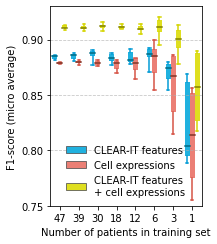

In [17]:
# now pass directly into boxplot_performance:
ax, df_a_out = boxplot_performance(
    df_a_f1,
    value_col="Value",
    group_col="Group",
    order=sorted(df_a_f1["Configuration"].unique())[::-1],
    show_mean_of_medians=False,
    show_total=False,
    label_map=label_map,
    ylim=[0.75,.93],
    yticks=[0.75,0.8,0.85,0.9],
    figsize=(3,3.5),
    ylabel="F1-score (micro average)",
    xlabel="Number of patients in training set",
    legend_loc="lower center",
    legend_ncol=1,
)

# display the resulting dataframe
display(df_a_out)

# save plot
fig = ax.get_figure()
fig.savefig("3a.svg", format="svg")


## Figure 3b
b) shows the micro-average F1-scores for 4-layer MLPs predicting cell classes in the TNBC2-MIBI44 dataset with DeepCell_MC17 labels. The MLPs receive three different inputs:
1. Features generated by a CLEAR-IT encoder pre-trained on this dataset (blue)
2. Cell expressions and cell sizes computed using the segmentation masks from DeepCell (red)
3. The concatenation of the previous feature sets (yellow)

Let's first define the path of the results and build a list of the individual entries for the label reduction.

In [ ]:
# build entries
tests_dir = Path(OUTPUTS_DIR,"maps_benchmark","TNBC2-MIBI44","labelreduction_with_sampling")
scenarios = {
    "features":      Path(tests_dir,"features"),
    "expressions":            Path(tests_dir,"expressions"),
    "features_expressions":    Path(tests_dir,"features_expressions"),
}
entries = discover_entries(scenarios)

# define mapping for nicer strings in plot legend
label_map = {
    "features": "CLEAR-IT features",
    "expressions": "Cell expressions",
    "features_expressions": "CLEAR-IT features \n+ cell expressions"
}

Next, we gather the results from the detected entries and compute the micro-average F1-scores of the test set in the dataframe `df_b_f1`.

In [19]:
# gather F1‐scores (micro average) per folder
df_b_f1 = gather_metric(entries, metric="f1", average="micro")
# enforce group ordering in dataframe
group_order = pd.api.types.CategoricalDtype(categories=["features","expressions","features_expressions"], ordered=True)
df_b_f1["Group"] = df_b_f1["Group"].astype(group_order)
df_b_f1 = df_b_f1.sort_values("Group")

Finally, we use the dataframe to generate the plot. The function also outputs `df_b_out` which contains the median values of the boxes.

,features,expressions,features_expressions
Configuration,,,
30,0.806880,0.765093,0.823586
25,0.799000,0.759714,0.818837
19,0.798474,0.753389,0.817356
12,0.789995,0.737271,0.802824
8,0.776420,0.715363,0.790888
4,0.752989,0.707557,0.760386
2,0.665886,0.658835,0.660926
1,0.616072,0.561393,0.624015


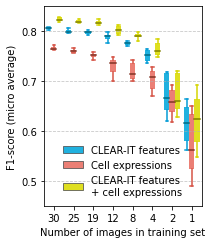

In [20]:
# now pass directly into boxplot_performance:
ax, df_b_out = boxplot_performance(
    df_b_f1,
    value_col="Value",
    group_col="Group",
    order=sorted(df_b_f1["Configuration"].unique())[::-1],
    show_mean_of_medians=False,
    show_total=False,
    label_map=label_map,
    ylim=[0.45,.85],
    yticks=[0.5,0.6,0.7,0.8],
    figsize=(3,3.5),
    ylabel="F1-score (micro average)",
    xlabel="Number of images in training set",
    legend_loc="lower center",
    legend_ncol=1,
)

# display the resulting dataframe
display(df_b_out)

# save plot
fig = ax.get_figure()
fig.savefig("3b.svg", format="svg")
